<a href="https://colab.research.google.com/github/busemagden/Basic_list/blob/master/Finansverileri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install yfinance pandas numpy

In [38]:
!pip install yfinance pandas matplotlib

In [39]:
!pip install yfinance pandas matplotlib scikit-learn

# **Uzun Vadeli Tahmin**
Lineer Regresyon Modeli

Hisse senedi sembolünü girin (örneğin: THYAO.IS): THYAO.IS
THYAO.IS için veri çekiliyor...
Veri başarıyla çekildi.
Fibonacci Direnç Noktaları: R1: 253.95, R2: 206.90, R3: 130.84


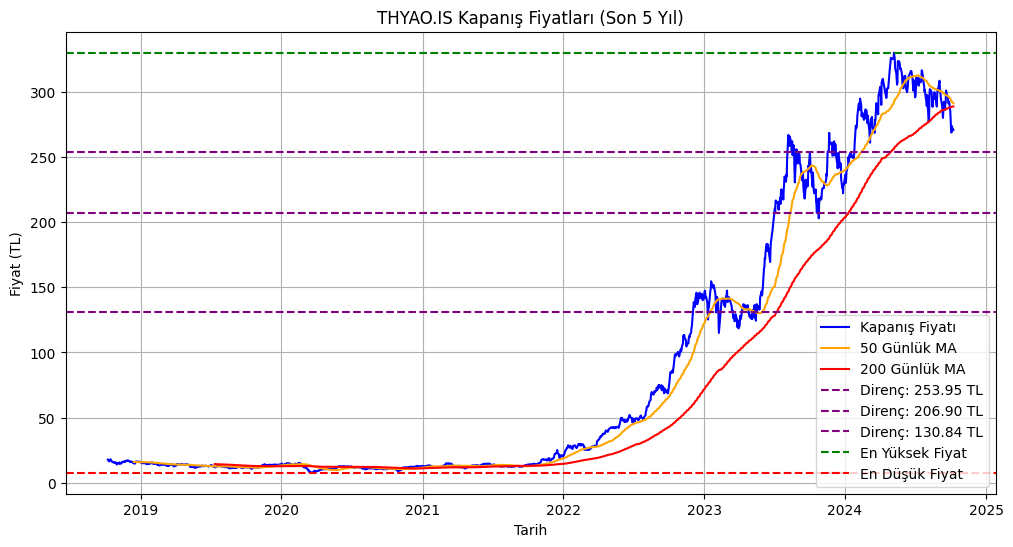

Mevcut Fiyat: 270.75 TL
Tahmin Edilen Fiyat: 238.76 TL
Tahmin: Düşüş Eğiliminde
Piyasa Değeri: 372335.41 Milyon TL
P/E Oranı: 3.7593725
Hisse Başına Kazanç (EPS): 144.01
Borç/Özsermaye Oranı: 76.304
Temettü Verimliliği: Bilgi Yok

Son 1 Haftalık Açılış ve Kapanış Fiyatları:
              Open   Close
Date                      
2024-09-30  291.75  285.00
2024-10-01  285.25  277.75
2024-10-02  277.00  271.50
2024-10-03  272.00  268.75
2024-10-04  271.00  273.75
2024-10-07  274.75  270.50
2024-10-08  270.00  270.75
Fiyatın düşmesi bekleniyor. Direnç noktasını aşamıyor.


In [48]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from datetime import datetime, timedelta

def hisse_verilerini_cek(sembol):
    # Son 5 yıl için hisse verilerini çek (bugün dahil)
    end_date = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')  # Bugün dahil olacak şekilde
    veriler = yf.download(sembol, start='2018-10-08', end=end_date)
    return veriler

def grafik_goster(veriler, fib_levels):
    plt.figure(figsize=(12, 6))
    plt.plot(veriler['Close'], label='Kapanış Fiyatı', color='blue')
    plt.plot(veriler['MA50'], label='50 Günlük MA', color='orange')
    plt.plot(veriler['MA200'], label='200 Günlük MA', color='red')

    # Direnç noktalarını grafikte göster
    for level in fib_levels:
        plt.axhline(y=level, color='purple', linestyle='--', label=f'Direnç: {level:.2f} TL')

    plt.title(f'{sembol} Kapanış Fiyatları (Son 5 Yıl)')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (TL)')
    plt.axhline(y=veriler['Close'].max(), color='g', linestyle='--', label='En Yüksek Fiyat')
    plt.axhline(y=veriler['Close'].min(), color='r', linestyle='--', label='En Düşük Fiyat')
    plt.legend()
    plt.grid()
    plt.show()

def rsi_hesapla(veriler, period=14):
    delta = veriler['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

def fibonacci_noktaları(veriler):
    max_price = veriler['Close'].max()
    min_price = veriler['Close'].min()

    level_1 = max_price - (max_price - min_price) * 0.236
    level_2 = max_price - (max_price - min_price) * 0.382
    level_3 = max_price - (max_price - min_price) * 0.618

    return level_1, level_2, level_3

def tahmin_et(veriler):
    kapanis_fiyatlari = veriler['Close'].values.reshape(-1, 1)

    zaman = np.array(range(len(kapanis_fiyatlari))).reshape(-1, 1)

    model = LinearRegression()
    model.fit(zaman, kapanis_fiyatlari)

    son_gun = np.array([[len(kapanis_fiyatlari)]])
    tahmin = model.predict(son_gun)

    return tahmin[0][0]

def analiz_yap(sembol):
    print(f"{sembol} için veri çekiliyor...")

    veriler = hisse_verilerini_cek(sembol)

    if not veriler.empty:
        print("Veri başarıyla çekildi.")

        # Hareketli ortalamaları hesapla
        veriler['MA50'] = veriler['Close'].rolling(window=50).mean()
        veriler['MA200'] = veriler['Close'].rolling(window=200).mean()

        # RSI hesapla
        veriler['RSI'] = rsi_hesapla(veriler)

        # Fibonacci noktalarını hesapla
        fib_levels = fibonacci_noktaları(veriler)

        print(f"Fibonacci Direnç Noktaları: R1: {fib_levels[0]:.2f}, R2: {fib_levels[1]:.2f}, R3: {fib_levels[2]:.2f}")

        # Grafik gösterimi
        grafik_goster(veriler, fib_levels)

        mevcut_fiyat = veriler['Close'].iloc[-1]

        print(f"Mevcut Fiyat: {mevcut_fiyat:.2f} TL")

        # Tahmin yap
        tahmin = tahmin_et(veriler)

        print(f"Tahmin Edilen Fiyat: {tahmin:.2f} TL")

        if tahmin > mevcut_fiyat:
            print("Tahmin: Yükseliş Eğiliminde")
        else:
            print("Tahmin: Düşüş Eğiliminde")

        # Temel finansal verilere ulaşma
        hisse_bilgileri = yf.Ticker(sembol)

        pe_orani = hisse_bilgileri.info.get('forwardPE', 'Bilgi Yok')
        piyasa_degeri = hisse_bilgileri.info.get('marketCap', 'Bilgi Yok')
        eps = hisse_bilgileri.info.get('trailingEps', 'Bilgi Yok')
        borc_ozsermaye_orani = hisse_bilgileri.info.get('debtToEquity', 'Bilgi Yok')
        temettü_verimliliği = hisse_bilgileri.info.get('dividendYield', 'Bilgi Yok')

        # Piyasa değerini TL cinsinden gösterme
        if isinstance(piyasa_degeri, int):
            piyasa_degeri_tl = piyasa_degeri / 1e6  # Milyon TL cinsine çevirme
            print(f"Piyasa Değeri: {piyasa_degeri_tl:.2f} Milyon TL")

        print(f"P/E Oranı: {pe_orani}")
        print(f"Hisse Başına Kazanç (EPS): {eps}")
        print(f"Borç/Özsermaye Oranı: {borc_ozsermaye_orani}")
        print(f"Temettü Verimliliği: {temettü_verimliliği}")

        # Son 1 haftalık açılış ve kapanış fiyatlarını göster
        son_bir_hafta = veriler.tail(7)[['Open', 'Close']]
        print("\nSon 1 Haftalık Açılış ve Kapanış Fiyatları:")
        print(son_bir_hafta)

        # Sonuçların değerlendirilmesi
        if mevcut_fiyat < fib_levels[0]:
            print("Fiyatın yükselmesi bekleniyor. Direnç noktasını aşabilir.")
            if pe_orani < 10:
                print("Düşük P/E oranı ile potansiyel alım fırsatı.")
            else:
                print("P/E oranı normal seviyelerde.")

            if borc_ozsermaye_orani < 0.5:
                print("Borç/Özsermaye oranı düşük; finansal sağlık iyi.")

            if temettü_verimliliği > 0:
                print("Temettü ödemeleri mevcut; yatırımcılar için cazip.")

            if mevcut_fiyat > son_bir_hafta['Close'].mean():
                print("Son bir haftada fiyat ortalamasının üzerinde; olumlu bir sinyal.")

            else:
                print("Son bir haftada fiyat ortalamasının altında; dikkatli olunmalı.")

        else:
            print("Fiyatın düşmesi bekleniyor. Direnç noktasını aşamıyor.")

if __name__ == "__main__":
    sembol = input("Hisse senedi sembolünü girin (örneğin: THYAO.IS): ")
    analiz_yap(sembol)

In [56]:
!pip install yfinance pandas numpy matplotlib scikit-learn tensorflow

# **LSTM MODELİ**

büyük veri setlerinde kullanmak daha mantıklı

Hisse senedi sembolünü girin (örneğin: THYAO.IS): THYAO.IS
THYAO.IS için veri çekiliyor...
Veri başarıyla çekildi.


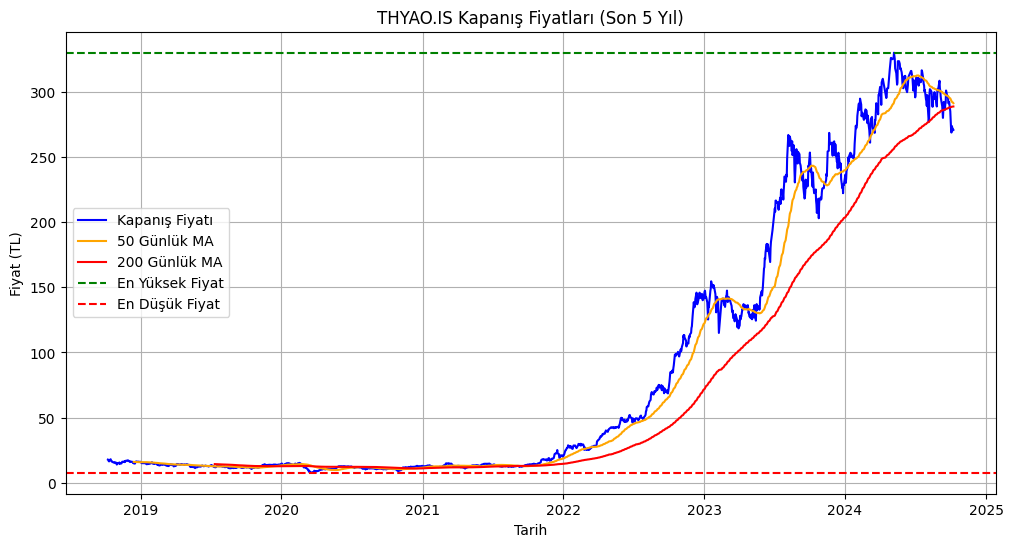

Mevcut Fiyat: 270.75 TL
Epoch 1/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - loss: 0.0132
Epoch 2/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 44s 32ms/step - loss: 0.0028
Epoch 3/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - loss: 0.0020
Epoch 4/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - loss: 0.0017
Epoch 5/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - loss: 0.0019
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
Tahmin Edilen Fiyat: 267.19 TL


In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from datetime import datetime, timedelta

def hisse_verilerini_cek(sembol):
    # Son 5 yıl için hisse verilerini çek (bugün dahil)
    end_date = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')  # Bugün dahil olacak şekilde
    veriler = yf.download(sembol, start='2018-10-08', end=end_date)
    return veriler

def grafik_goster(veriler):
    plt.figure(figsize=(12, 6))
    plt.plot(veriler['Close'], label='Kapanış Fiyatı', color='blue')
    plt.plot(veriler['MA50'], label='50 Günlük MA', color='orange')
    plt.plot(veriler['MA200'], label='200 Günlük MA', color='red')

    plt.title(f'{sembol} Kapanış Fiyatları (Son 5 Yıl)')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (TL)')
    plt.axhline(y=veriler['Close'].max(), color='g', linestyle='--', label='En Yüksek Fiyat')
    plt.axhline(y=veriler['Close'].min(), color='r', linestyle='--', label='En Düşük Fiyat')
    plt.legend()
    plt.grid()
    plt.show()

def rsi_hesapla(veriler, period=14):
    delta = veriler['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

def lstm_modeli(veriler):
    # Veriyi ölçeklendir
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(veriler['Close'].values.reshape(-1, 1))

    # Eğitim ve test verilerini ayırma
    training_data_len = int(np.ceil(len(scaled_data) * .95))  # %95 eğitim %5 test

    train_data = scaled_data[0:int(training_data_len), :]

    # Veriyi LSTM girişi için hazırlama
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Veriyi yeniden şekillendirme
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # LSTM Modeli Oluşturma
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.2))

    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(25))

    model.add(Dense(1))  # Çıkış katmanı

    # Modeli derleme
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Modeli eğitme
    model.fit(x_train, y_train, batch_size=1, epochs=5)

    return model, scaler

def analiz_yap(sembol):
    print(f"{sembol} için veri çekiliyor...")

    veriler = hisse_verilerini_cek(sembol)

    if not veriler.empty:
        print("Veri başarıyla çekildi.")

        # Hareketli ortalamaları hesapla
        veriler['MA50'] = veriler['Close'].rolling(window=50).mean()
        veriler['MA200'] = veriler['Close'].rolling(window=200).mean()

        # RSI hesapla
        veriler['RSI'] = rsi_hesapla(veriler)

        # Grafik gösterimi
        grafik_goster(veriler)

        mevcut_fiyat = veriler['Close'].iloc[-1]

        print(f"Mevcut Fiyat: {mevcut_fiyat:.2f} TL")

        # LSTM modeli oluştur ve eğit
        model, scaler = lstm_modeli(veriler)

        # Veriyi ölçeklendir (lstm_modeli fonksiyonundan taşıdık)
        scaled_data = scaler.fit_transform(veriler['Close'].values.reshape(-1, 1))

        # Son günleri tahmin etme
        last_60_days = scaled_data[-60:]
        last_60_days = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))

        predicted_price = model.predict(last_60_days)
        predicted_price = scaler.inverse_transform(predicted_price)  # Ölçekten geri çevir

        print(f"Tahmin Edilen Fiyat: {predicted_price[0][0]:.2f} TL")

if __name__ == "__main__":
    sembol = input("Hisse senedi sembolünü girin (örneğin: THYAO.IS): ")
    analiz_yap(sembol)

# **Holt-Winters (Üssel Düzeltme)**

Hisse senedi sembolünü girin (örneğin: THYAO.IS): THYAO.IS
THYAO.IS için veri çekiliyor...
Veri başarıyla çekildi.


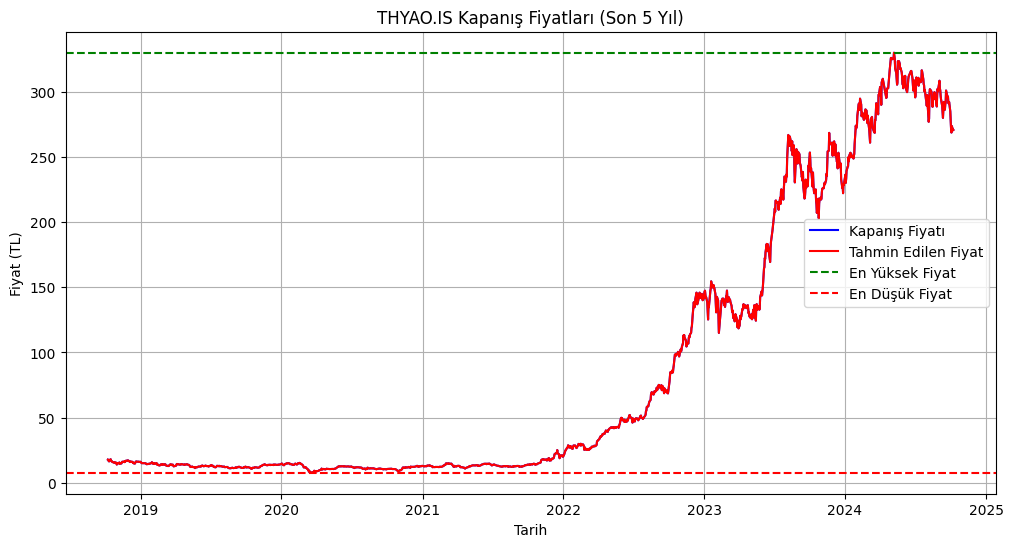

Son 5 Gün İçin Tahmin Edilen Fiyatlar: [271.10184933 271.42626736 271.42978692 271.64112117 271.89917358]


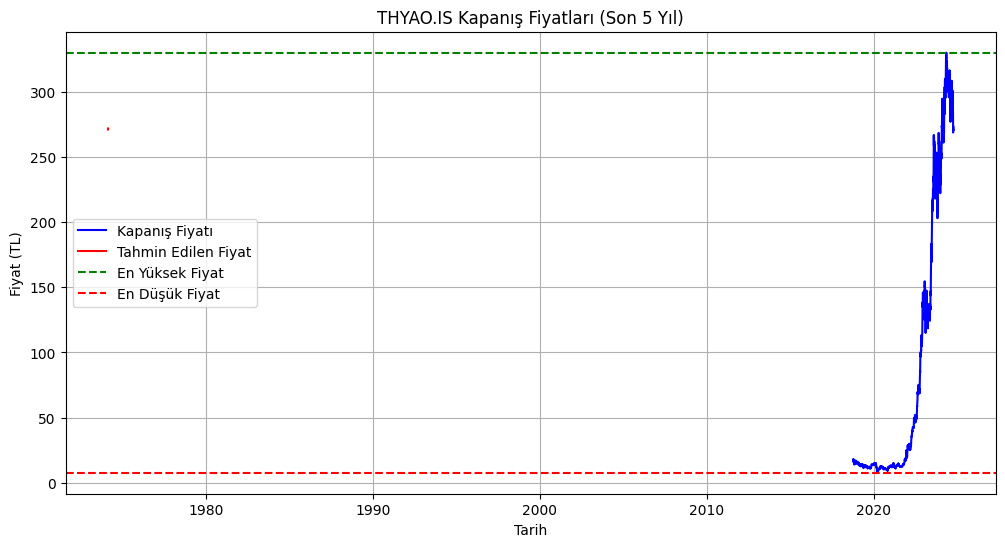

In [62]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime, timedelta

def hisse_verilerini_cek(sembol):
    # Son 5 yıl için hisse verilerini çek (bugün dahil)
    end_date = (datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d')  # Bugün dahil olacak şekilde
    veriler = yf.download(sembol, start='2018-10-08', end=end_date)
    return veriler

def grafik_goster(veriler, predictions):
    plt.figure(figsize=(12, 6))
    plt.plot(veriler['Close'], label='Kapanış Fiyatı', color='blue')
    plt.plot(predictions, label='Tahmin Edilen Fiyat', color='red')

    plt.title(f'{sembol} Kapanış Fiyatları (Son 5 Yıl)')
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (TL)')
    plt.axhline(y=veriler['Close'].max(), color='g', linestyle='--', label='En Yüksek Fiyat')
    plt.axhline(y=veriler['Close'].min(), color='r', linestyle='--', label='En Düşük Fiyat')
    plt.legend()
    plt.grid()
    plt.show()

def holt_winters_modeli(veriler):
    # Holt-Winters Üssel Düzeltme modelini oluşturma
    model = ExponentialSmoothing(veriler['Close'], trend='add', seasonal='add', seasonal_periods=12)
    model_fit = model.fit()

    # Tahmin yapma
    predictions = model_fit.forecast(steps=5)  # Son 5 gün için tahmin
    return predictions

def analiz_yap(sembol):
    print(f"{sembol} için veri çekiliyor...")

    veriler = hisse_verilerini_cek(sembol)

    if not veriler.empty:
        print("Veri başarıyla çekildi.")

        # Hareketli ortalamaları hesapla
        veriler['MA50'] = veriler['Close'].rolling(window=50).mean()
        veriler['MA200'] = veriler['Close'].rolling(window=200).mean()

        # Grafik gösterimi
        grafik_goster(veriler, veriler['Close'])  # İlk olarak mevcut kapanış fiyatlarını göster

        # Holt-Winters modeli ile tahmin yap
        predictions = holt_winters_modeli(veriler)

        print(f"Son 5 Gün İçin Tahmin Edilen Fiyatlar: {predictions.values}")

        # Grafik gösterimi
        grafik_goster(veriler, predictions)

if __name__ == "__main__":
    sembol = input("Hisse senedi sembolünü girin (örneğin: THYAO.IS): ")
    analiz_yap(sembol)